In [3]:
# 导入相关的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

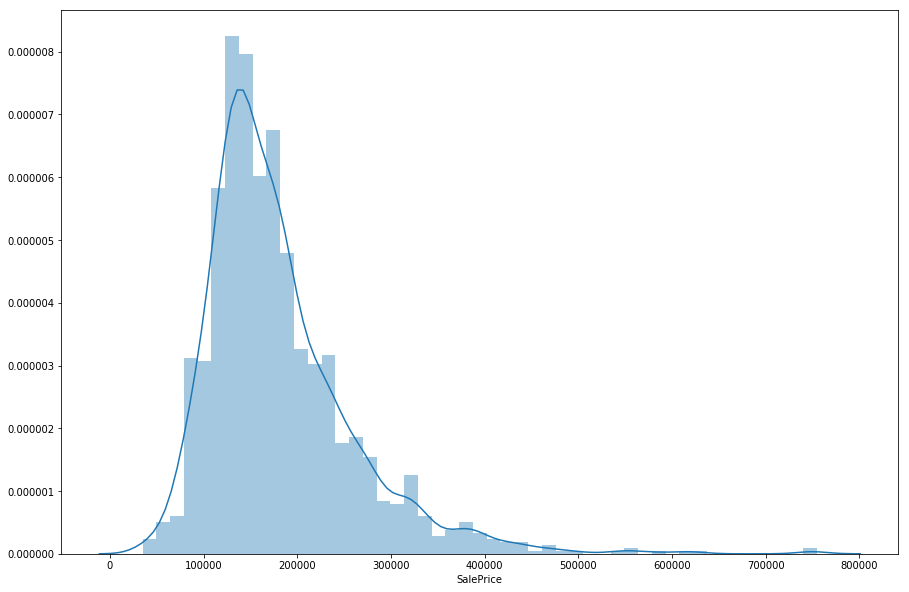

In [10]:
sns.distplot(df_train['SalePrice'])

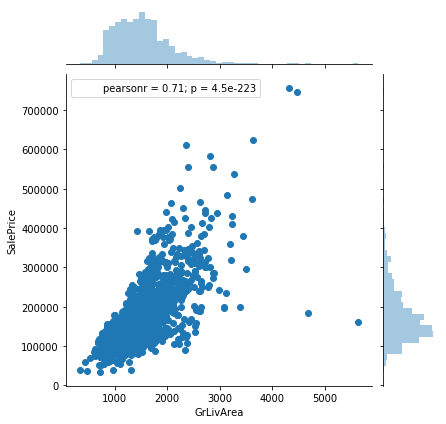

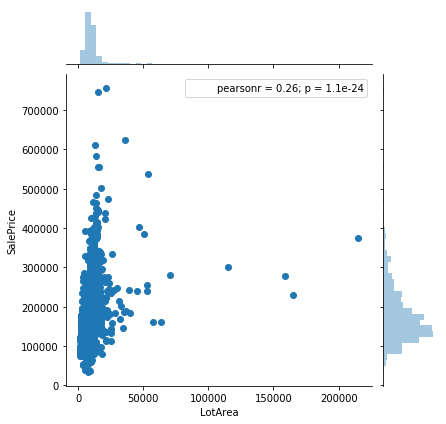

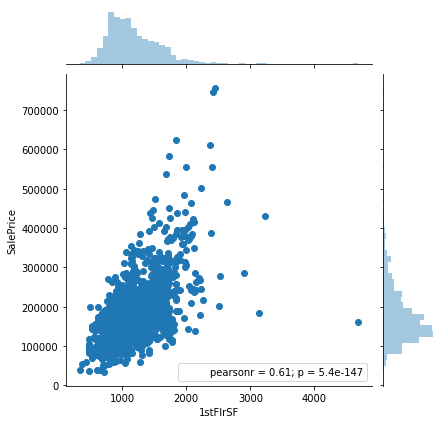

In [17]:
sns.jointplot(x = 'GrLivArea',y = 'SalePrice',data = df_train)
sns.jointplot(x = 'LotArea', y = 'SalePrice',data = df_train)
sns.jointplot(x = '1stFlrSF',y = 'SalePrice',data = df_train)

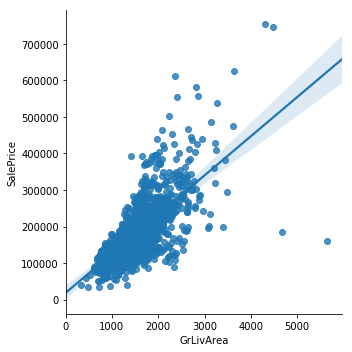

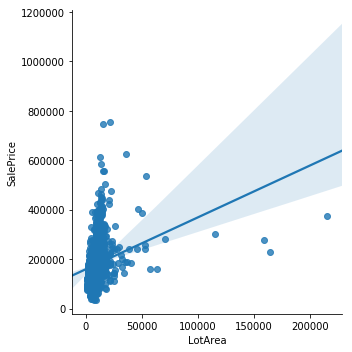

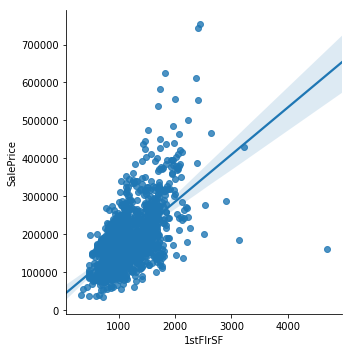

In [18]:
sns.lmplot(x = 'GrLivArea',y = 'SalePrice',data = df_train)
sns.lmplot(x = 'LotArea', y = 'SalePrice',data = df_train)
sns.lmplot(x = '1stFlrSF',y = 'SalePrice',data = df_train)

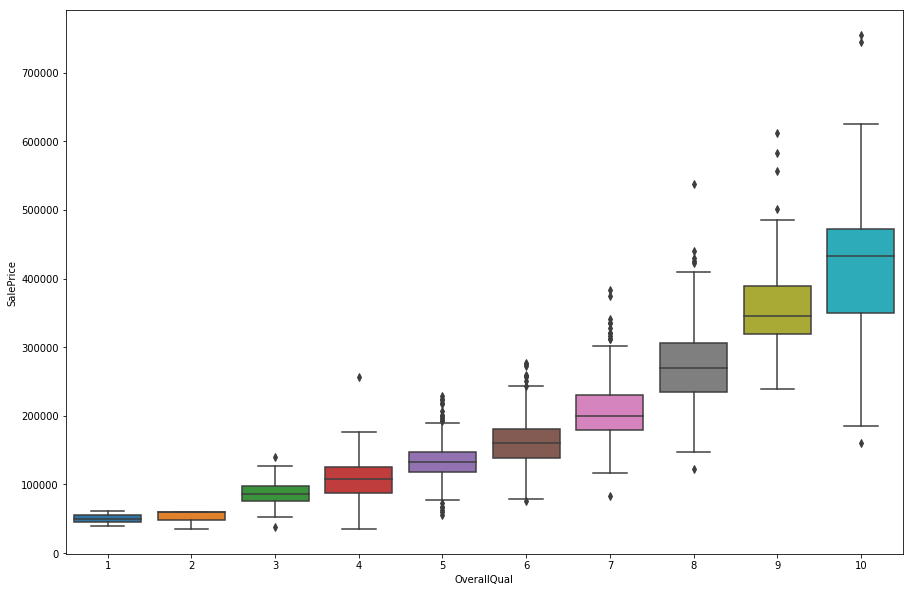

In [19]:
sns.boxplot(x = 'OverallQual',y = 'SalePrice',data = df_train)

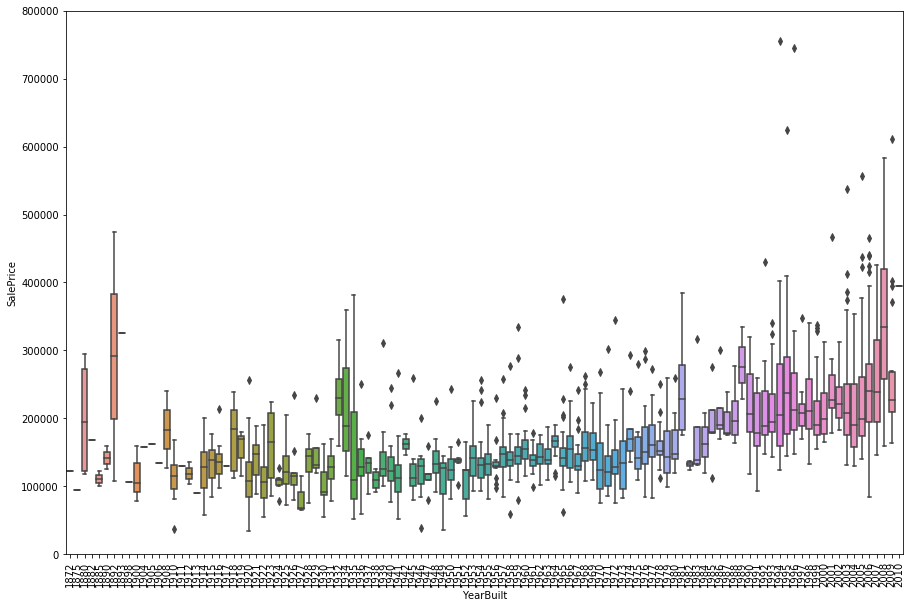

In [22]:
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

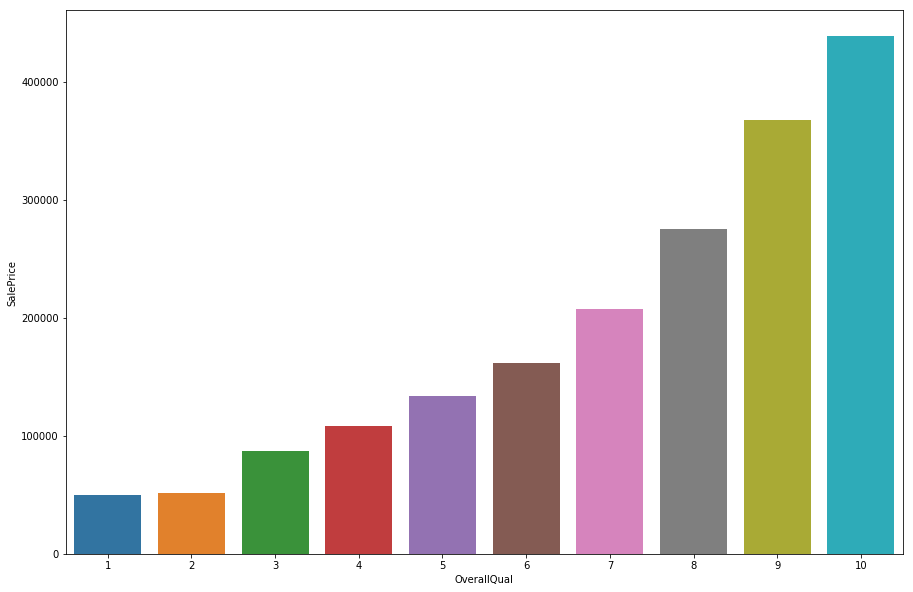

In [31]:
grouped = df_train.groupby('OverallQual')
g1 = grouped['SalePrice'].mean()
df1 = g1.reset_index('OverallQual')
sns.barplot(x = 'OverallQual',y = 'SalePrice',data = df1)

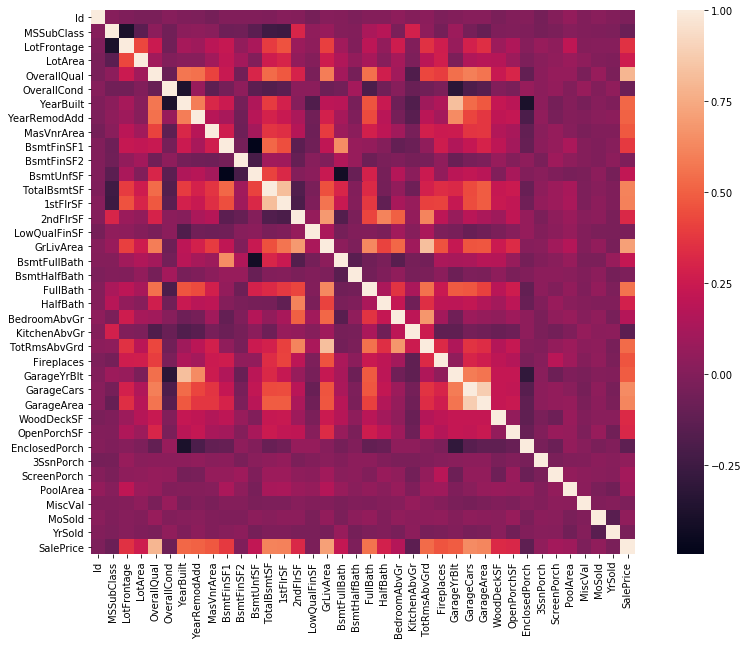

In [33]:
corrmatrix = df_train.corr()
sns.heatmap(corrmatrix,square=True,vmax=1.0)

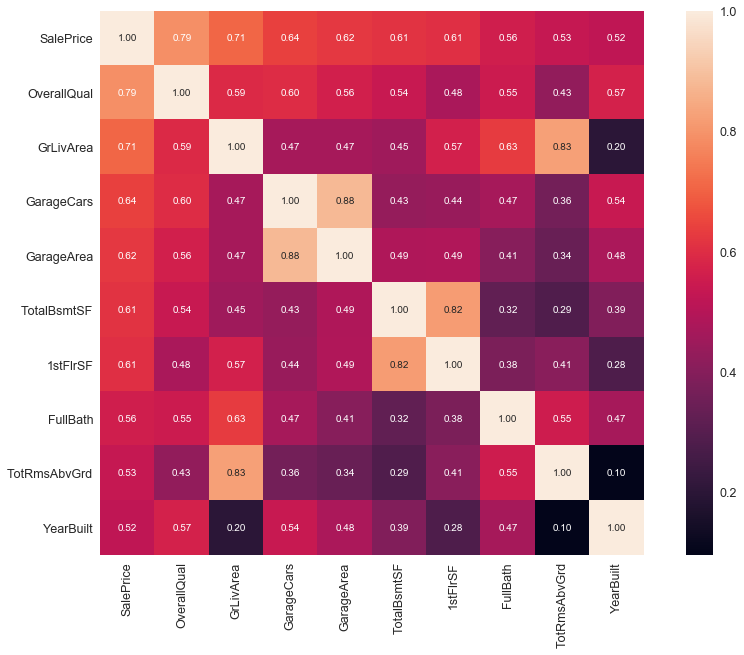

In [34]:
k =10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

<span class="burk">结论：</span>
1. 'OverallQual', 'GrLivArea' , 'TotalBsmtSF' 这三个变量与 'SalePrice'有很强的线性关系
2. 'GarageCars' 和 'GarageArea'与'SalePrice'有很强的线性关系；但是它们两个之间共线了，因此只需要任取一个即可！不妨取GarageCars，因为它与目标的关联性更强一点
3. 'TotalBsmtSF' 和 '1stFloor' 存在共线，我们不妨只取TotalBsmtSF；'TotRmsAbvGrd' 和 'GrLivArea',共线，我们只取 GrLivArea
4. 还有两个FullBath，YearBuilt

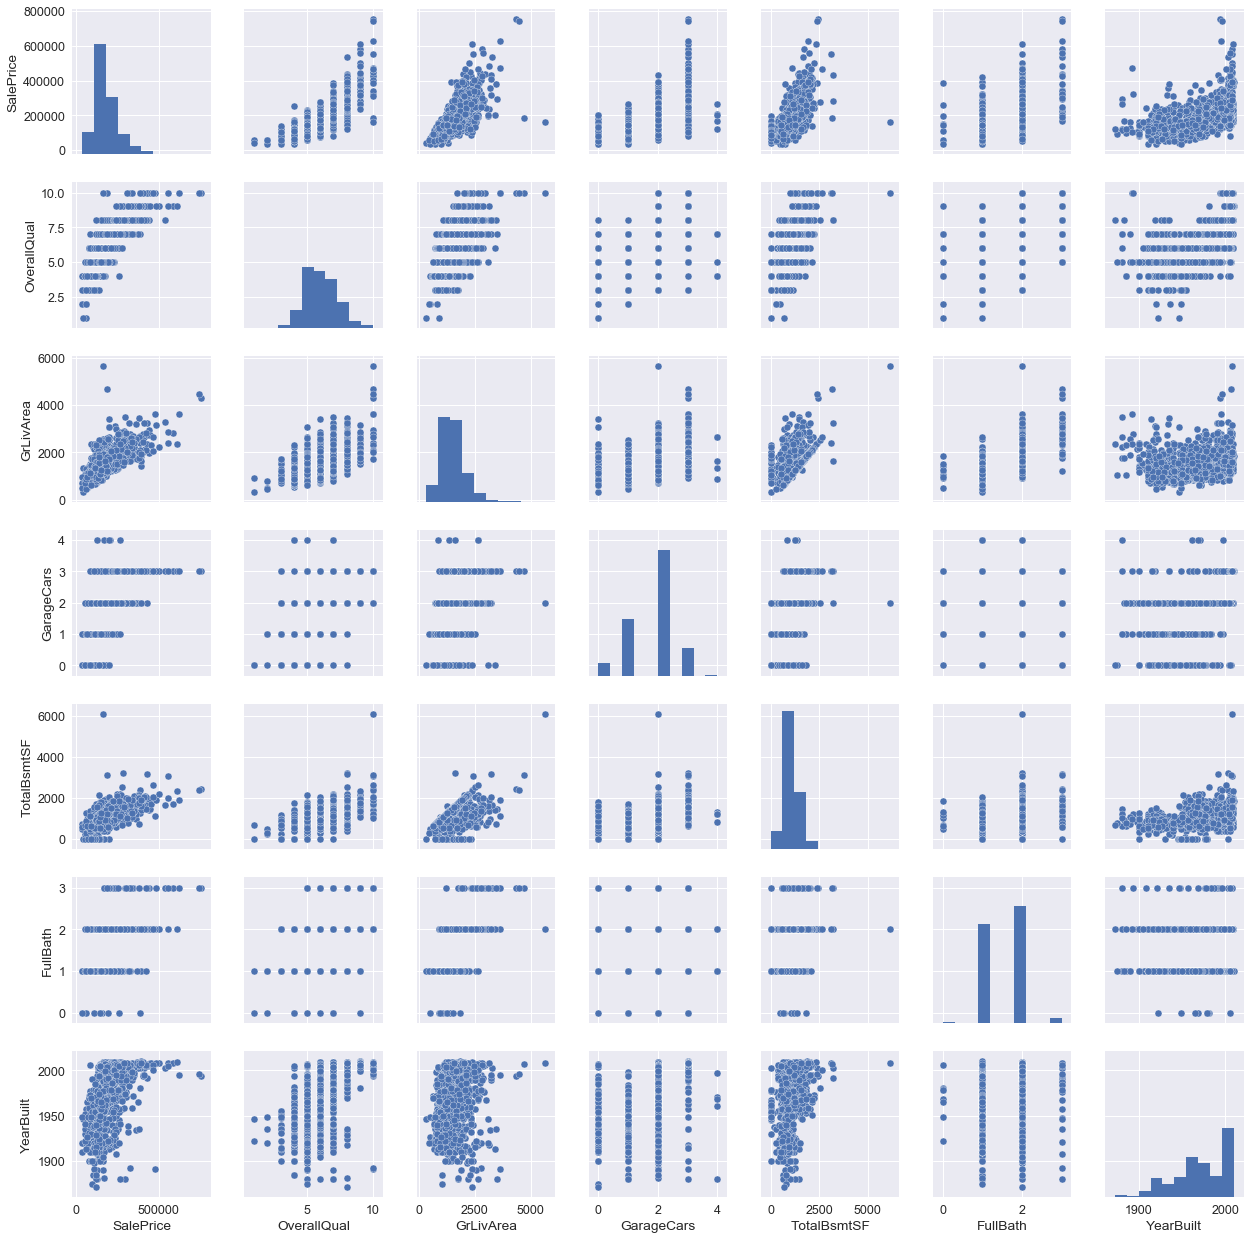

In [38]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)

In [40]:
total = df_train.isnull().sum().sort_values(ascending=False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [42]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [44]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [45]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [46]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

lr_model = ols("SalePrice~C(OverallQual) +GrLivArea +C(GarageCars) + TotalBsmtSF +C(FullBath) + YearBuilt",data =df_train ).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     328.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:08:47   Log-Likelihood:                -17310.
No. Observations:                1459   AIC:                         3.466e+04
Df Residuals:                    1439   BIC:                         3.477e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.815e+05 

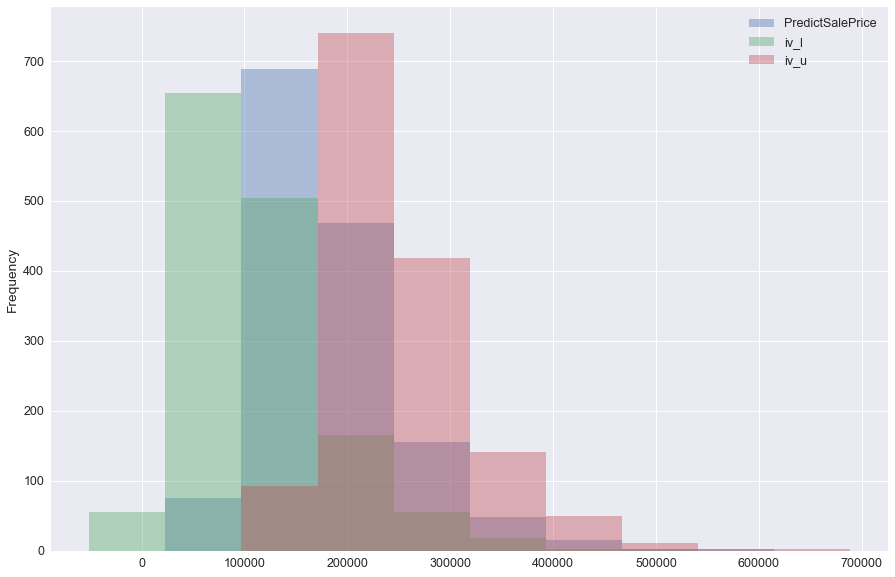

In [47]:
prstd, iv_l, iv_u = wls_prediction_std(lr_model,alpha=0.05)
predict_low_upper = pd.DataFrame([lr_model.predict(),iv_l, iv_u ],index = ['PredictSalePrice', 'iv_l', 'iv_u' ]).T
predict_low_upper.plot(kind = "hist",alpha = 0.4)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
gbdt = RandomForestRegressor()
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].values
y = df_train['SalePrice'].values
gbdt.fit(X,y)

predict_values = gbdt.predict(X)

print(r2_score(y,predict_values))

0.9707283641051043
